In [1]:
import torch
from torch.autograd import Variable

In [2]:
batch_size, input_size, hidden_size, output_size = 64, 1000, 100, 10
learning_rate = 1e-4  # 1e-6 is too small here with nn

In [3]:
x = Variable(torch.randn(batch_size, input_size), requires_grad = False) # False is default
y = Variable(torch.randn(batch_size, output_size), requires_grad = False)

In [4]:
model = torch.nn.Sequential(
        torch.nn.Linear(input_size, hidden_size),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_size, output_size))

loss_fn = torch.nn.MSELoss(reduction = 'sum')

In [5]:
model

Sequential(
  (0): Linear(in_features=1000, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)

In [6]:
for p in model.named_parameters():
    print(p)

('0.weight', Parameter containing:
tensor([[-0.0301,  0.0121, -0.0003,  ...,  0.0301,  0.0132, -0.0092],
        [ 0.0065,  0.0026, -0.0156,  ...,  0.0238,  0.0250, -0.0304],
        [-0.0141, -0.0214,  0.0192,  ..., -0.0035,  0.0291, -0.0315],
        ...,
        [ 0.0234,  0.0276, -0.0098,  ...,  0.0010,  0.0191, -0.0035],
        [ 0.0182,  0.0194,  0.0147,  ..., -0.0237, -0.0253, -0.0140],
        [ 0.0259, -0.0294,  0.0123,  ..., -0.0121, -0.0186,  0.0076]],
       requires_grad=True))
('0.bias', Parameter containing:
tensor([-2.2546e-02,  1.1052e-02,  3.0837e-02, -2.0881e-02,  7.0461e-03,
        -1.9255e-02,  2.0122e-03, -2.1108e-02,  2.9750e-02, -1.7045e-02,
        -2.5547e-02, -1.2228e-02, -2.2772e-03, -2.1980e-02,  2.6953e-02,
         1.8219e-02,  2.3824e-02,  9.1345e-03,  7.0369e-03, -1.3076e-02,
         1.2450e-02,  2.6373e-02, -4.0750e-03,  1.1095e-03,  1.6941e-02,
        -1.4410e-02, -3.0150e-02, -1.4694e-03,  7.4339e-03,  1.9478e-02,
         1.5445e-02, -3.1209e-02

In [7]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.0301,  0.0121, -0.0003,  ...,  0.0301,  0.0132, -0.0092],
        [ 0.0065,  0.0026, -0.0156,  ...,  0.0238,  0.0250, -0.0304],
        [-0.0141, -0.0214,  0.0192,  ..., -0.0035,  0.0291, -0.0315],
        ...,
        [ 0.0234,  0.0276, -0.0098,  ...,  0.0010,  0.0191, -0.0035],
        [ 0.0182,  0.0194,  0.0147,  ..., -0.0237, -0.0253, -0.0140],
        [ 0.0259, -0.0294,  0.0123,  ..., -0.0121, -0.0186,  0.0076]],
       requires_grad=True)
Parameter containing:
tensor([-2.2546e-02,  1.1052e-02,  3.0837e-02, -2.0881e-02,  7.0461e-03,
        -1.9255e-02,  2.0122e-03, -2.1108e-02,  2.9750e-02, -1.7045e-02,
        -2.5547e-02, -1.2228e-02, -2.2772e-03, -2.1980e-02,  2.6953e-02,
         1.8219e-02,  2.3824e-02,  9.1345e-03,  7.0369e-03, -1.3076e-02,
         1.2450e-02,  2.6373e-02, -4.0750e-03,  1.1095e-03,  1.6941e-02,
        -1.4410e-02, -3.0150e-02, -1.4694e-03,  7.4339e-03,  1.9478e-02,
         1.5445e-02, -3.1209e-02, -3.1564e-02,  3.8388e-0

### Optim module
"torch.optim" is a module that implements various optimization algorithms used for building neural networks.

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [9]:
all_losses = []

for i in range(500):
    # forward
    prediction = model(x)
    
    # loss
    loss = loss_fn(prediction, y)
#     print('i = %d, loss = %d' %(i, loss.data))
    all_losses.append(loss)
    
    # backward
#     model.zero_grad()
    optimizer.zero_grad()
    loss.backward()
    
    # weight update
#     for parameter in model.parameters():
#         parameter.data -= learning_rate * parameter.grad.data
    optimizer.step() 
    # performs a parameter update based on the current gradient

guess what?  
it's going slower...

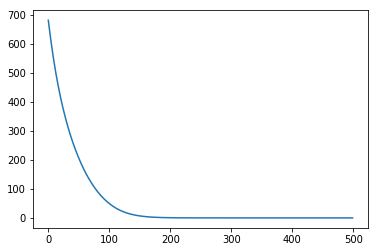

In [10]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
plt.plot(all_losses)